In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


Microsoft

In [ ]:
ticker_symbol_msft = 'MSFT'
msft_ticker = yf.Ticker(ticker_symbol_msft)
expiration_dates_msft = msft_ticker.options
expiration_date = expiration_dates_msft[0]

msft_options = msft_ticker.option_chain(expiration_date)

msft_calls = msft_options.calls
msft_puts = msft_options.puts
print(msft_calls.head())

        contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0  MSFT240823C00230000 2024-08-19 18:20:03+00:00   230.0     194.27  192.20   
1  MSFT240823C00240000 2024-08-09 16:12:35+00:00   240.0     164.24  182.20   
2  MSFT240823C00270000 2024-07-16 14:02:16+00:00   270.0     181.80  149.80   
3  MSFT240823C00300000 2024-08-21 16:58:34+00:00   300.0     123.49  122.25   
4  MSFT240823C00305000 2024-08-01 18:08:32+00:00   305.0     110.27  117.25   

      ask    change  percentChange  volume  openInterest  impliedVolatility  \
0  195.35  4.919998       2.598362     1.0             3           3.610353   
1  186.10  0.000000       0.000000     NaN             0           1.937500   
2  152.55  0.000000       0.000000     1.0             0           0.000010   
3  126.15  4.299995       3.607681     1.0             7           1.445315   
4  121.15  0.000000       0.000000     NaN             0           1.382816   

   inTheMoney contractSize currency  
0        Tru

In [ ]:
msft_calls_cleaned = msft_calls.dropna()

msft_calls_cleaned['Moneyness'] = msft_calls_cleaned['lastPrice'] / msft_calls_cleaned['strike']
msft_calls_cleaned['TimeToExpiration'] = (pd.to_datetime(expiration_date) - pd.Timestamp.now()).days
print(msft_calls_cleaned.head())

        contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0  MSFT240823C00230000 2024-08-19 18:20:03+00:00   230.0     194.27  192.20   
2  MSFT240823C00270000 2024-07-16 14:02:16+00:00   270.0     181.80  149.80   
3  MSFT240823C00300000 2024-08-21 16:58:34+00:00   300.0     123.49  122.25   
5  MSFT240823C00310000 2024-08-16 16:21:18+00:00   310.0     109.47  112.25   
7  MSFT240823C00320000 2024-08-19 19:25:58+00:00   320.0     100.05  102.25   

      ask    change  percentChange  volume  openInterest  impliedVolatility  \
0  195.35  4.919998       2.598362     1.0             3           3.610353   
2  152.55  0.000000       0.000000     1.0             0           0.000010   
3  126.15  4.299995       3.607681     1.0             7           1.445315   
5  116.15  0.000000       0.000000     3.0             3           1.320316   
7  106.15  0.000000       0.000000     1.0             1           1.199223   

   inTheMoney contractSize currency  Moneyness  Ti

<ipython-input-19-f3e2ad9f5a89>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft_calls_cleaned['Moneyness'] = msft_calls_cleaned['lastPrice'] / msft_calls_cleaned['strike']
<ipython-input-19-f3e2ad9f5a89>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft_calls_cleaned['TimeToExpiration'] = (pd.to_datetime(expiration_date) - pd.Timestamp.now()).days


In [ ]:
msft_calls_cleaned.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Moneyness,TimeToExpiration
0,MSFT240823C00230000,2024-08-19 18:20:03+00:00,230.0,194.27,192.20,195.35,4.919998,2.598362,1.0,3,3.610353,True,REGULAR,USD,0.844652,1
2,MSFT240823C00270000,2024-07-16 14:02:16+00:00,270.0,181.80,149.80,152.55,0.000000,0.000000,1.0,0,0.000010,True,REGULAR,USD,0.673333,1
3,MSFT240823C00300000,2024-08-21 16:58:34+00:00,300.0,123.49,122.25,126.15,4.299995,3.607681,1.0,7,1.445315,True,REGULAR,USD,0.411633,1
5,MSFT240823C00310000,2024-08-16 16:21:18+00:00,310.0,109.47,112.25,116.15,0.000000,0.000000,3.0,3,1.320316,True,REGULAR,USD,0.353129,1
7,MSFT240823C00320000,2024-08-19 19:25:58+00:00,320.0,100.05,102.25,106.15,0.000000,0.000000,1.0,1,1.199223,True,REGULAR,USD,0.312656,1


Text(0, 0.5, 'Frequency')

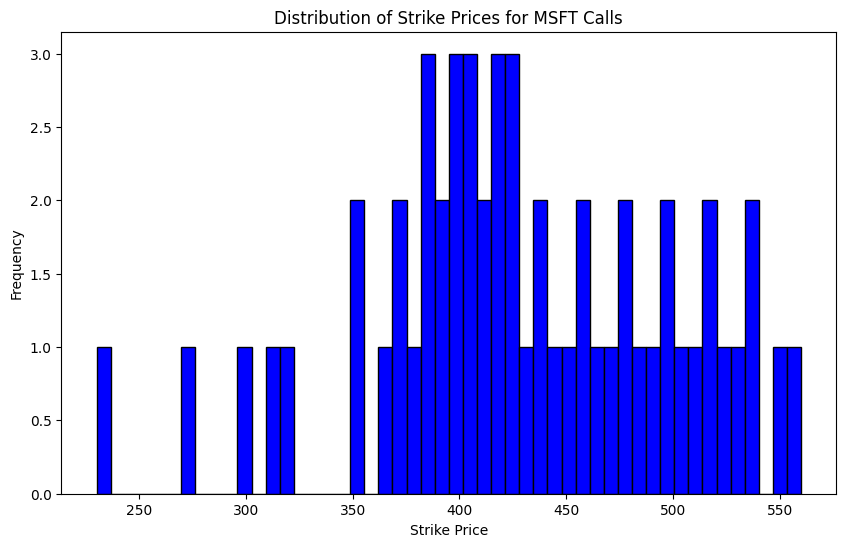

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(msft_calls_cleaned['strike'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Strike Prices for MSFT Calls')
plt.xlabel('Strike Price')
plt.ylabel('Frequency')

Using Random Forests algorithm

In [ ]:
X = msft_calls_cleaned[['Moneyness', 'TimeToExpiration', 'impliedVolatility']]
y = msft_calls_cleaned['lastPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.1764923636363658


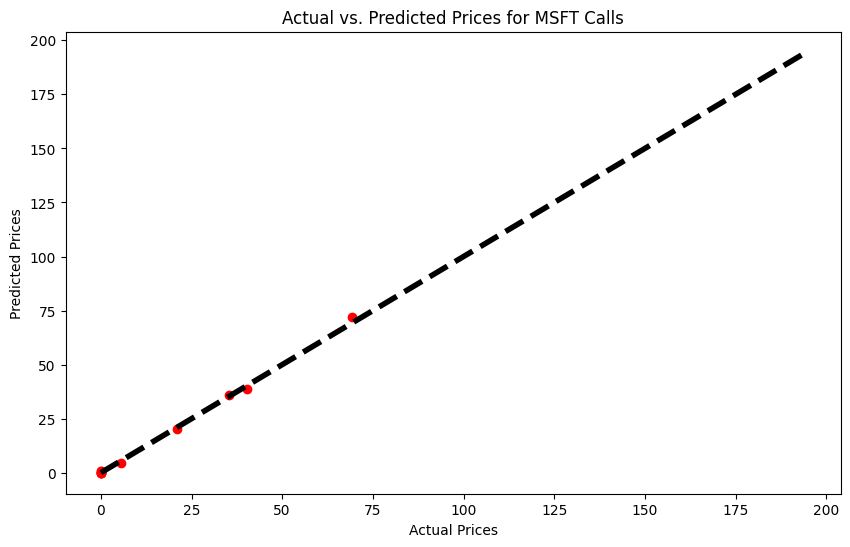

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red')
plt.title('Actual vs. Predicted Prices for MSFT Calls')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)

Text(0, 0.5, 'Feature')

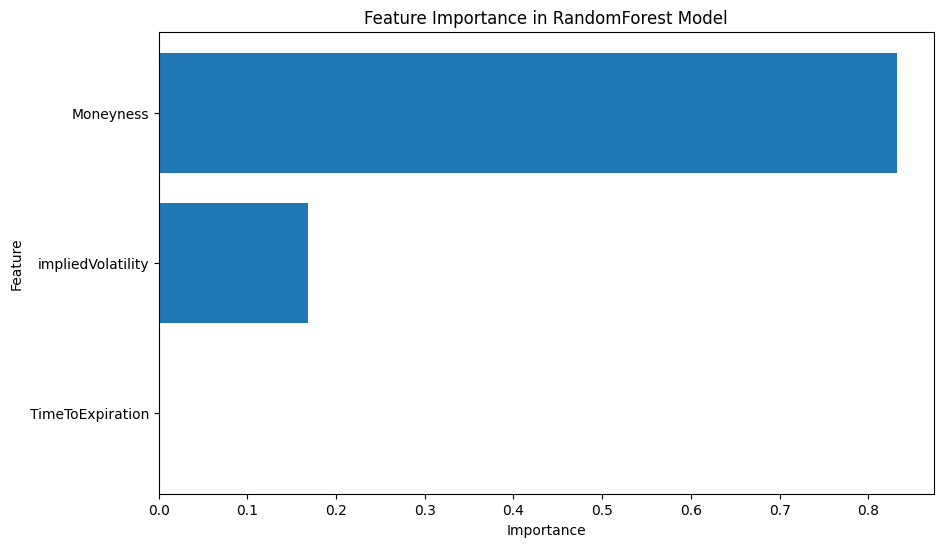

In [ ]:
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance in RandomForest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')

Using LSTM

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2


<ipython-input-38-ffb4c5ea73bc>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft_calls_cleaned['Moneyness'] = msft_calls_cleaned['lastPrice'] / msft_calls_cleaned['strike']
<ipython-input-38-ffb4c5ea73bc>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft_calls_cleaned['TimeToExpiration'] = (pd.to_datetime(expiration_date) - pd.Timestamp.now()).days
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. Wh

Epoch 1/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - loss: 3499.0454 - val_loss: 742.3939 - learning_rate: 0.0010
Epoch 2/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2144.5129 - val_loss: 741.8237 - learning_rate: 0.0010
Epoch 3/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3218.1743 - val_loss: 741.2131 - learning_rate: 0.0010
Epoch 4/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2801.8823 - val_loss: 740.5720 - learning_rate: 0.0010
Epoch 5/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2398.4497 - val_loss: 739.8950 - learning_rate: 0.0010
Epoch 6/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3857.3193 - val_loss: 739.1652 - learning_rate: 0.0010
Epoch 7/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3905.1934 - val_loss: 738.3883 - learning_rate: 0.0010
Epoch 8/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3235.5200 - val_loss: 737.5604 - learning_rate: 0.0010
Epoch 9/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3555.0371 - val_loss: 736.6153 - lear

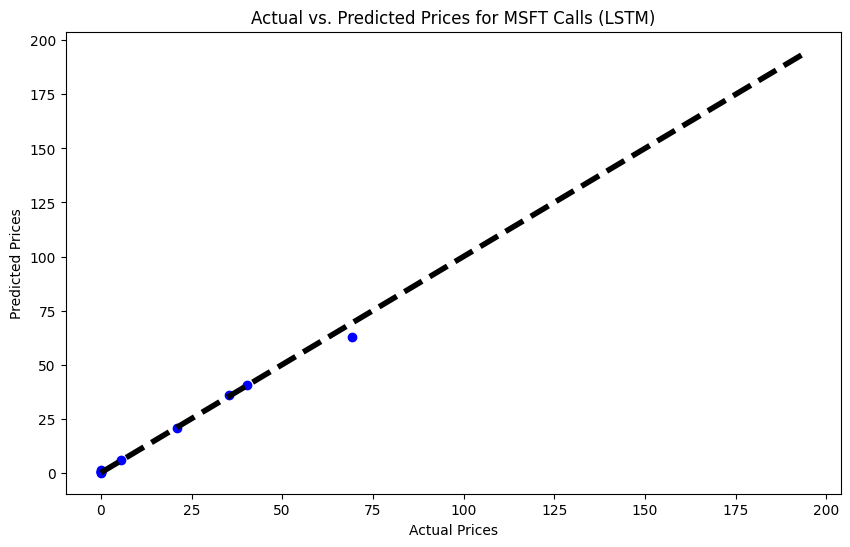

In [ ]:
ticker_symbol_msft = 'MSFT'
msft_ticker = yf.Ticker(ticker_symbol_msft)

expiration_dates_msft = msft_ticker.options
expiration_date = expiration_dates_msft[0]

msft_options = msft_ticker.option_chain(expiration_date)
msft_calls = msft_options.calls
msft_calls_cleaned = msft_calls.dropna()

msft_calls_cleaned['Moneyness'] = msft_calls_cleaned['lastPrice'] / msft_calls_cleaned['strike']
msft_calls_cleaned['TimeToExpiration'] = (pd.to_datetime(expiration_date) - pd.Timestamp.now()).days

X = msft_calls_cleaned[['Moneyness', 'TimeToExpiration', 'impliedVolatility']]
y = msft_calls_cleaned['lastPrice']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
X_train, X_test, y_train, y_test = train_test_split(X_scaled_reshaped, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False,kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))

model.add(Dense(25, activation='relu'))
model.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='mean_squared_error')

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-2, verbose=1)

history = model.fit(X_train, y_train, epochs=400, batch_size=16, validation_data=(X_test, y_test),callbacks=[lr_scheduler])

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs. Predicted Prices for MSFT Calls (LSTM)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.show()
